In [1]:
from pyntcloud import PyntCloud
import pandas as pd
import os
import numpy as np
import PIL.Image as Image
from matplotlib import pyplot as plt
import cv2

In [2]:
def load_velo_scan(velo_filename):
    scan = np.fromfile(velo_filename, dtype=np.float32)
    scan = scan.reshape((-1, 4))
    return scan


def paint_points(points, color=[192, 0, 0]):
    # color = [r, g, b]
    color = np.array([color])
    new_pts = np.zeros([points.shape[0], 6])
    new_pts[:, :3] = points
    new_pts[:, 3:] = new_pts[:, 3:] + color
    return new_pts

image_idx = 5
test_dir = "training"
object_dir = f"/home/vassili/projects/Object_Detection/pseudo_lidar/KITTI/object/{test_dir}/"
pseudo_file_dir = f"{object_dir}pseudo-lidar_velodyne/"
pseudo_lidar_frame_name = f"{pseudo_file_dir}/{str(image_idx).zfill(6)}.bin"
lidar_file_dir = f"{object_dir}velodyne/"
lidar_frame_name = f"{lidar_file_dir}/{str(image_idx).zfill(6)}.bin"

imagepath = f"/home/vassili/projects/Object_Detection/pseudo_lidar/KITTI/object/{test_dir}/image_2/{str(image_idx).zfill(6)}.png"



points = load_velo_scan(lidar_frame_name)[:, :3]
lidar_pd_points = pd.DataFrame(
    paint_points(points), columns=["x", "y", "z", "red", "green", "blue"]
)

points = load_velo_scan(pseudo_lidar_frame_name)[:, :3]
pseudo_lidar_pd_points = pd.DataFrame(
    paint_points(points), columns=["x", "y", "z", "red", "green", "blue"]
)

pseudo_lidar_pd_points[["red"]] = 0
pseudo_lidar_pd_points[["blue"]] = 192

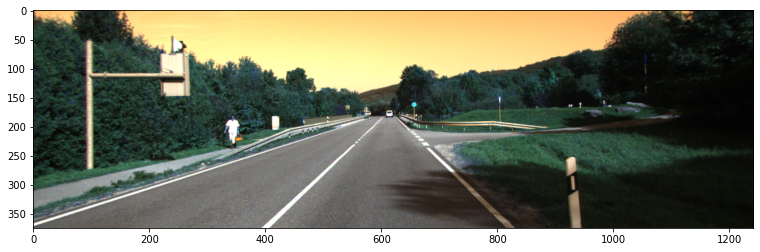

In [3]:
plt.figure(figsize=(20, 4))
plt.imshow(cv2.imread(imagepath))

In [4]:
cloud = PyntCloud(lidar_pd_points)
scenic_scene = cloud.plot(initial_point_size=0.02, return_scene=True, cmap='Blues', backend="pythreejs")

cloud = PyntCloud(pseudo_lidar_pd_points)
cloud.plot(initial_point_size=0.02, scene=scenic_scene, backend="pythreejs")


/home/vassili/.pyenv/versions/3.6.8/envs/pseudo-lidar-env/lib/python3.6/site-packages/pythreejs/traits.py:203: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(0.203766576904143, 22.132978215701947, 3.028…